## **Digital Image Processing Lab Task: 04**
## **2023-SE-21**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


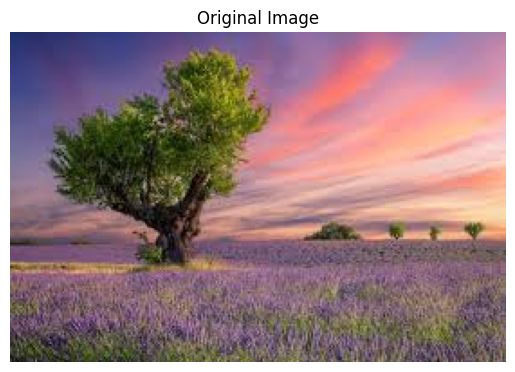

In [2]:
# Read image
image = cv2.imread('4.jfif')  # Replace with your file path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


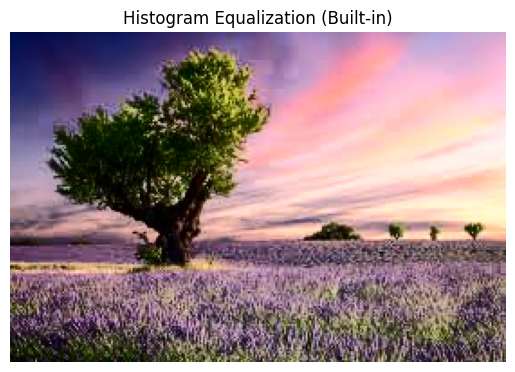

In [3]:
# Convert to YCrCb color space
img_y_cr_cb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Equalize only the Y channel (luminance)
img_y_cr_cb[:, :, 0] = cv2.equalizeHist(img_y_cr_cb[:, :, 0])

# Convert back to RGB
equalized_builtin = cv2.cvtColor(img_y_cr_cb, cv2.COLOR_YCrCb2RGB)

plt.imshow(equalized_builtin)
plt.title("Histogram Equalization (Built-in)")
plt.axis('off')
plt.show()


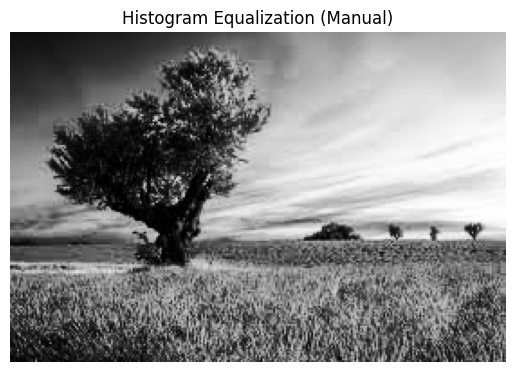

In [4]:
def manual_hist_equalization(img):
    # Convert to grayscale for simplicity
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(gray.flatten(), 256, [0,256])

    # Compute CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Normalize CDF
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    # Map pixel values using equalized CDF
    img_equalized = cdf[gray]
    return img_equalized

manual_eq = manual_hist_equalization(image)

plt.imshow(manual_eq, cmap='gray')
plt.title("Histogram Equalization (Manual)")
plt.axis('off')
plt.show()


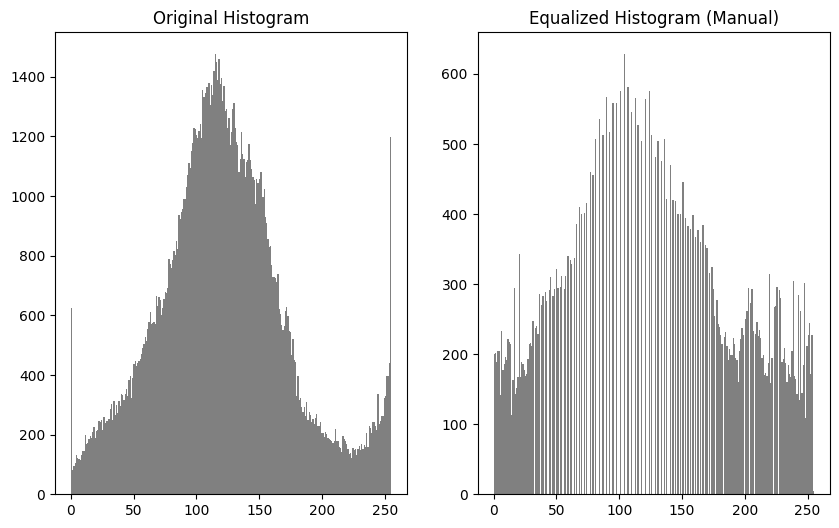

In [5]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(image_rgb.ravel(), bins=256, color='gray')
plt.title("Original Histogram")

plt.subplot(1,2,2)
plt.hist(manual_eq.ravel(), bins=256, color='gray')
plt.title("Equalized Histogram (Manual)")
plt.show()


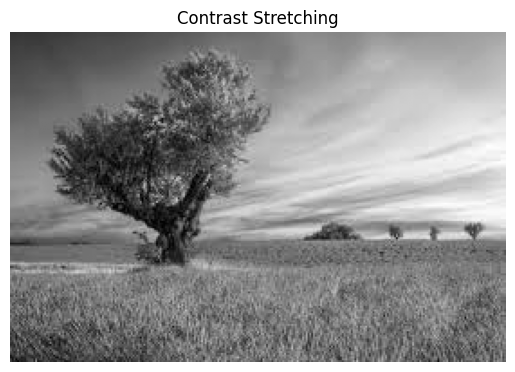

In [6]:
def contrast_stretching(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    r_min, r_max = np.min(gray), np.max(gray)
    stretched = ((gray - r_min) / (r_max - r_min)) * 255
    return stretched.astype(np.uint8)

contrast_img = contrast_stretching(image)

plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')
plt.show()


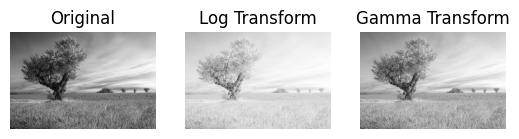

In [7]:
def log_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    c = 255 / np.log(1 + np.max(gray))
    log_img = c * (np.log(1 + gray))
    return np.array(log_img, dtype=np.uint8)

def gamma_transform(img, gamma=1.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized = gray / 255.0
    gamma_corrected = np.power(normalized, gamma)
    return np.uint8(gamma_corrected * 255)

log_img = log_transform(image)
gamma_img = gamma_transform(image, gamma=0.5)

# Display
titles = ['Original', 'Log Transform', 'Gamma Transform']
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), log_img, gamma_img]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


# Image Enhancement Techniques: Histogram Equalization, Contrast Stretching, and Intensity Transformations

## 1. Introduction

Image enhancement is a crucial preprocessing step in image processing and computer vision. It improves the visual quality of an image, making features more distinct and easier to analyze. 

In this task, we explore **various image enhancement techniques**:

1. **Histogram Equalization** (built-in and manual)
2. **Contrast Stretching**
3. **Logarithmic Transformation**
4. **Gamma Correction**

These methods enhance the contrast and brightness of images, highlighting details that may not be clearly visible in the original image.

---

## 2. Methodology

### 2.1 Loading and Displaying the Image
- The image is read using OpenCV (`cv2.imread`) and converted from **BGR to RGB** for correct display in matplotlib.

### 2.2 Histogram Equalization
Histogram equalization redistributes pixel intensities to span the full range (0-255), improving contrast.

1. **Built-in Method**:
   - Convert the image to **YCrCb color space**.
   - Apply **histogram equalization** only on the **luminance (Y) channel** to preserve color balance.
   - Convert back to RGB for visualization.

2. **Manual Method**:
   - Compute the **histogram** of grayscale pixel intensities.
   - Compute the **cumulative distribution function (CDF)**.
   - Normalize the CDF and map pixel intensities to obtain the equalized image.
   - Display the **histogram before and after equalization** to observe the contrast improvement.

### 2.3 Contrast Stretching
- Expands the pixel intensity range of the image to cover the full 0-255 range.
- Formula:  
  \[
  \text{stretched} = \frac{(\text{pixel} - r_{\min})}{(r_{\max} - r_{\min})} \times 255
  \]
- Useful for improving contrast in images with low intensity variation.

### 2.4 Logarithmic Transformation
- Applies a logarithmic function to enhance **dark regions** of the image.
- Formula:  
  \[
  s = c \cdot \log(1 + r)
  \]
  where \(r\) is the input intensity and \(c\) is a scaling constant.
- Highlights details in **low-intensity areas**.

### 2.5 Gamma Correction (Power-Law Transformation)
- Adjusts brightness non-linearly using:  
  \[
  s = r^\gamma
  \]
- Gamma < 1 brightens the image, Gamma > 1 darkens the image.
- Useful for correcting display or camera nonlinearities.

### 2.6 Visualization
- Display all transformations side by side for **comparison**:
  - Original grayscale
  - Logarithmic transformation
  - Gamma correction
- This allows visual assessment of enhancement effectiveness.

---

## 3. Observations

- **Histogram Equalization** enhances contrast across the image.
- **Manual equalization** demonstrates the underlying principle of CDF mapping.
- **Contrast stretching** spreads pixel intensities uniformly.
- **Log transformation** improves visibility of dark regions.
- **Gamma correction** adjusts brightness nonlinearly, emphasizing either dark or bright regions depending on the gamma value.

---

## 4. Conclusion

These image enhancement techniques are fundamental for:

1. Preprocessing images for **feature extraction** and **object detection**.
2. Improving **visual quality** in low-contrast or dark images.
3. Preparing images for advanced **computer vision tasks** like segmentation, classification, and recognition.

By understanding and applying these methods, one can improve both human visual perception and the effectiveness of automated image processing algorithms.
